<a href="https://colab.research.google.com/github/kkrphm/project-Models/blob/main/sample_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect to Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Important Libraries**

In [30]:
# For Data Processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.utils  import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,roc_auc_score, classification_report,roc_curve,auc
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import img_to_array,ImageDataGenerator, load_img
from keras.utils import np_utils
from tensorflow.keras.utils  import to_categorical
from numpy import expand_dims
from sklearn.preprocessing import LabelBinarizer

# For DL Models
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D,BatchNormalization,LayerNormalization, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model,load_model
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from keras.applications import *

# For Data Visualization
import seaborn as sns
import cv2
%matplotlib inline
import matplotlib.pyplot as plt #used for plotting and analyzing data
import matplotlib
andy_theme = {'axes.grid': True,
              'grid.linestyle': '--',
              'legend.framealpha': 1,
              'legend.facecolor': 'white',
              'legend.shadow': True,
              'legend.fontsize': 14,
              'legend.title_fontsize': 16,
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'axes.labelsize': 16,
              'axes.titlesize': 20,
              'axes.linewidth':'1',
              'axes.edgecolor':'0',
              'figure.dpi': 600
               }

# Miscellaneous       
import random
import warnings
warnings.filterwarnings("ignore")
import os #file I/O
from tqdm import tqdm



# **Load Data**

In [3]:
IMG_HEIGHT =512
IMG_WIDTH = 512
train_data = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Project (1)/Brain_Tumor/Training',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64)


test_data = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Project (1)/Brain_Tumor/Testing',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64,
shuffle=False)


class_names = train_data.class_names
print(class_names)
train_data

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']


<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# **Data Visualization**

In [6]:
trained_classes = []
test_classes=[] 
image_size = 150
for i in class_names:
    folderPath = os.path.join('/content/drive/MyDrive/Project (1)/Brain_Tumor/Training',i)
    for j in tqdm(os.listdir(folderPath)):
      trained_classes.append(i)
        
for i in class_names:
    folderPath = os.path.join('/content/drive/MyDrive/Project (1)/Brain_Tumor/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
      test_classes.append(i)

100%|██████████| 300/300 [00:00<00:00, 1330117.55it/s]


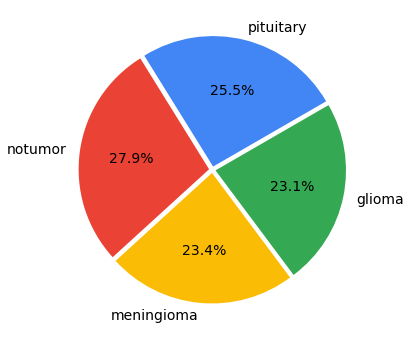

In [7]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in trained_classes if x=='pituitary']),
         len([x for x in trained_classes if x=='notumor']),
         len([x for x in trained_classes if x=='meningioma']),
         len([x for x in trained_classes if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

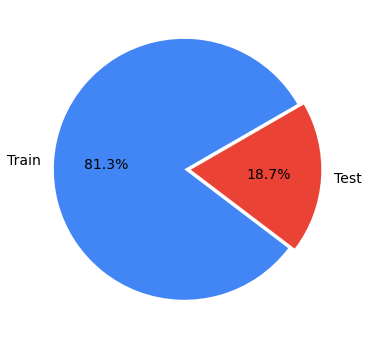

In [8]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(trained_classes), len(test_classes)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

In [9]:
labels={'glioma':0,'meningioma':1,'notumor':2,'pituitary':3}
trained_label=[]
test_label=[]
for i in trained_classes:
  trained_label.append(labels[i])
for i in test_classes:
  test_label.append(labels[i])
print(trained_label[:5])
print(test_label[:5])

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


# **Model Architecture**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=128,kernel_size=(6,6),strides=(4,4),padding='valid',activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))


model.add(keras.layers.Conv2D(filters=96,kernel_size=(6,6),strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=96,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(keras.layers.Conv2D(filters=24,kernel_size=(6,6),strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(keras.layers.Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu",kernel_regularizer=regularizers.l2(0.001)))

model.add(keras.layers.Dropout(0.30))

model.add(keras.layers.Dense(4,"softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 128)     13952     
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 96)        442464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 96)       0

# **Model Compilation**

In [ ]:
# from keras.optimizers import sgd_experimental
opt=tf.keras.optimizers.SGD(
    learning_rate=0.0001,
    momentum=0.9,
    name='SGD')
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = opt,metrics=["accuracy"])


# **Assign Checkpoint at every 640 epoches**

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Project/wm_save"
checkpoint_dir = os.path.dirname(checkpoint_path)
batch_size=64
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq=10*batch_size,
                                                 verbose=1)


# **Train the model with the new callback**

In [ ]:
history=model.fit(train_data,validation_data=test_data,epochs=100, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/100
90/90 [==============================] - 909s 9s/step - loss: 1.6739 - accuracy: 0.3584 - val_loss: 1.7294 - val_accuracy: 0.3280
Epoch 2/100
90/90 [==============================] - 37s 394ms/step - loss: 1.4995 - accuracy: 0.5247 - val_loss: 1.6769 - val_accuracy: 0.5156
Epoch 3/100
90/90 [==============================] - 37s 392ms/step - loss: 1.3487 - accuracy: 0.6261 - val_loss: 1.5812 - val_accuracy: 0.5759
Epoch 4/100
90/90 [==============================] - 38s 402ms/step - loss: 1.2309 - accuracy: 0.6794 - val_loss: 1.4685 - val_accuracy: 0.5584
Epoch 5/100
90/90 [==============================] - 37s 394ms/step - loss: 1.1575 - accuracy: 0.7036 - val_loss: 1.3281 - val_accuracy: 0.6491
Epoch 6/100
90/90 [==============================] - 37s 393ms/step - loss: 1.1029 - accuracy: 0.7197 - val_loss: 1.2762 - val_accuracy: 0.6438
Epoch 7/100
90/90 [==============================] - 37s 390ms/step - loss: 1.0552 - accuracy: 0.7381 - val_loss: 1.1745 - val_accuracy: 0

## **Model Evaluation**

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 6s 214ms/step - loss: 0.5027 - accuracy: 0.9489
Test loss: 0.5026805996894836
Test accuracy: 0.9488939642906189


# **Model Accuracy Progress**

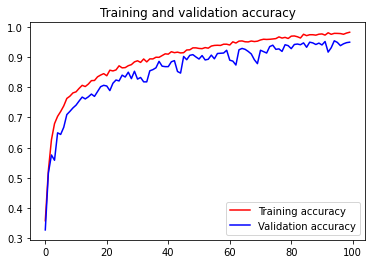

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Model Loss Progress**

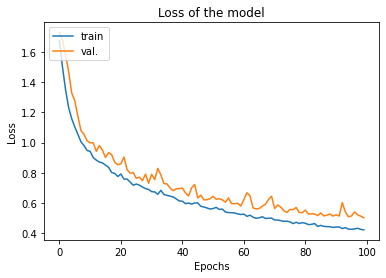

In [ ]:
# comparing training and testing loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val.'],loc='upper left')
plt.show()

## **Save the model**

In [ ]:
model.save('/content/drive/MyDrive/final model/94%model.h5')

**Model retrain to next 50 epoches**

In [ ]:
history1=model.fit(train_data,validation_data=test_data,epochs=50, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/50
90/90 [==============================] - 38s 397ms/step - loss: 0.4301 - accuracy: 0.9783 - val_loss: 0.5028 - val_accuracy: 0.9527
Epoch 2/50
90/90 [==============================] - 37s 391ms/step - loss: 0.4195 - accuracy: 0.9825 - val_loss: 0.5379 - val_accuracy: 0.9397
Epoch 3/50
90/90 [==============================] - 37s 392ms/step - loss: 0.4153 - accuracy: 0.9841 - val_loss: 0.5089 - val_accuracy: 0.9519
Epoch 4/50
90/90 [==============================] - 38s 397ms/step - loss: 0.4177 - accuracy: 0.9821 - val_loss: 0.5117 - val_accuracy: 0.9489
Epoch 5/50
90/90 [==============================] - 37s 394ms/step - loss: 0.4183 - accuracy: 0.9816 - val_loss: 0.5085 - val_accuracy: 0.9504
Epoch 6/50
90/90 [==============================] - 37s 393ms/step - loss: 0.4246 - accuracy: 0.9790 - val_loss: 0.5805 - val_accuracy: 0.9108
Epoch 7/50
59/90 [==================>...........] - ETA: 10s - loss: 0.4217 - accuracy: 0.9788
Epoch 7: saving model to /content/drive/MyDrive

## **Retrained Model evaluation**

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 7s 249ms/step - loss: 0.4635 - accuracy: 0.9703
Test loss: 0.463503897190094
Test accuracy: 0.970251739025116


# **Model Accuracy Progress**

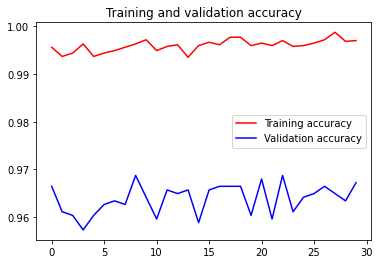

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## **Model Loss Progress**

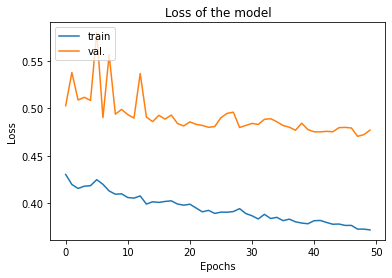

In [ ]:
# comparing training and testing loss 
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val.'],loc='upper left')
plt.show()

## **Save the model**

In [ ]:
model.save('/content/drive/MyDrive/final model/94%model1.h5')

In [ ]:
history2=model.fit(train_data,validation_data=test_data,epochs=30, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/30
90/90 [==============================] - 37s 393ms/step - loss: 0.3719 - accuracy: 0.9956 - val_loss: 0.4732 - val_accuracy: 0.9664
Epoch 2/30
90/90 [==============================] - 37s 391ms/step - loss: 0.3761 - accuracy: 0.9937 - val_loss: 0.4785 - val_accuracy: 0.9611
Epoch 3/30
90/90 [==============================] - 38s 410ms/step - loss: 0.3739 - accuracy: 0.9944 - val_loss: 0.4810 - val_accuracy: 0.9603
Epoch 4/30
90/90 [==============================] - 37s 396ms/step - loss: 0.3697 - accuracy: 0.9963 - val_loss: 0.4947 - val_accuracy: 0.9573
Epoch 5/30
90/90 [==============================] - 37s 394ms/step - loss: 0.3713 - accuracy: 0.9937 - val_loss: 0.4868 - val_accuracy: 0.9603
Epoch 6/30
90/90 [==============================] - 37s 393ms/step - loss: 0.3726 - accuracy: 0.9944 - val_loss: 0.4750 - val_accuracy: 0.9626
Epoch 7/30
39/90 [============>.................] - ETA: 17s - loss: 0.3653 - accuracy: 0.9984
Epoch 7: saving model to /content/drive/MyDrive

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 6s 234ms/step - loss: 0.4661 - accuracy: 0.9672
Test loss: 0.46607619524002075
Test accuracy: 0.9672006368637085


In [ ]:
model.save('/content/drive/MyDrive/final model/96%model2.h5')

In [ ]:
history3=model.fit(train_data,validation_data=test_data,epochs=30, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/30
90/90 [==============================] - 41s 441ms/step - loss: 0.3603 - accuracy: 0.9982 - val_loss: 0.4754 - val_accuracy: 0.9672
Epoch 2/30
90/90 [==============================] - 40s 421ms/step - loss: 0.3594 - accuracy: 0.9979 - val_loss: 0.4729 - val_accuracy: 0.9657
Epoch 3/30
90/90 [==============================] - 41s 439ms/step - loss: 0.3628 - accuracy: 0.9953 - val_loss: 0.4703 - val_accuracy: 0.9649
Epoch 4/30
90/90 [==============================] - 38s 403ms/step - loss: 0.3583 - accuracy: 0.9974 - val_loss: 0.4647 - val_accuracy: 0.9680
Epoch 5/30
79/90 [=========================>....] - ETA: 3s - loss: 0.3581 - accuracy: 0.9984
Epoch 5: saving model to /content/drive/MyDrive/Project/wm_save
90/90 [==============================] - 41s 439ms/step - loss: 0.3586 - accuracy: 0.9982 - val_loss: 0.4701 - val_accuracy: 0.9680
Epoch 6/30
90/90 [==============================] - 39s 410ms/step - loss: 0.3590 - accuracy: 0.9977 - val_loss: 0.4759 - val_accuracy: 0.

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 6s 218ms/step - loss: 0.4635 - accuracy: 0.9703
Test loss: 0.46350395679473877
Test accuracy: 0.970251739025116


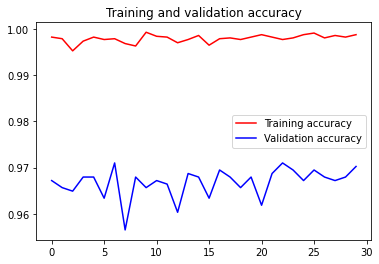

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history3.history['accuracy']
val_acc =history3.history['val_accuracy']
loss = history3.history['loss']
val_loss =history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

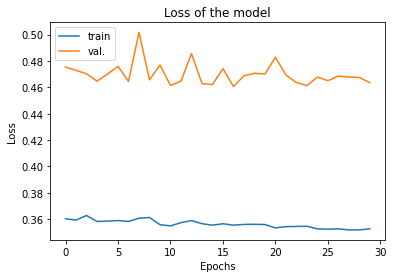

In [ ]:
# comparing training and testing loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val.'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/final model/97%model4.h5')

In [ ]:
history4=model.fit(train_data,validation_data=test_data,epochs=30, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/30
90/90 [==============================] - 40s 426ms/step - loss: 0.3518 - accuracy: 0.9984 - val_loss: 0.4700 - val_accuracy: 0.9657
Epoch 2/30
90/90 [==============================] - 38s 400ms/step - loss: 0.3523 - accuracy: 0.9989 - val_loss: 0.4569 - val_accuracy: 0.9687
Epoch 3/30
90/90 [==============================] - 39s 414ms/step - loss: 0.3515 - accuracy: 0.9989 - val_loss: 0.4604 - val_accuracy: 0.9680
Epoch 4/30
29/90 [========>.....................] - ETA: 20s - loss: 0.3498 - accuracy: 0.9984
Epoch 4: saving model to /content/drive/MyDrive/Project/wm_save
90/90 [==============================] - 38s 405ms/step - loss: 0.3504 - accuracy: 0.9988 - val_loss: 0.4630 - val_accuracy: 0.9695
Epoch 5/30
90/90 [==============================] - 37s 392ms/step - loss: 0.3501 - accuracy: 0.9993 - val_loss: 0.4608 - val_accuracy: 0.9680
Epoch 6/30
90/90 [==============================] - 37s 393ms/step - loss: 0.3518 - accuracy: 0.9989 - val_loss: 0.4648 - val_accuracy: 0

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 6s 220ms/step - loss: 0.4621 - accuracy: 0.9725
Test loss: 0.46207571029663086
Test accuracy: 0.972540020942688


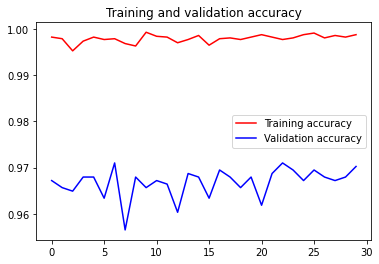

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history4.history['accuracy']
val_acc =history4.history['val_accuracy']
loss = history4.history['loss']
val_loss =history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

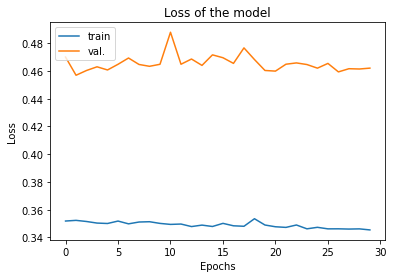

In [ ]:
# comparing training and testing loss 
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val.'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/final model/97%model5.h5')

In [ ]:
history5=model.fit(train_data,validation_data=test_data,epochs=30, batch_size=64, verbose=1,
  callbacks=[cp_callback])  # Pass callback to training

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/30
90/90 [==============================] - 40s 429ms/step - loss: 0.3460 - accuracy: 0.9988 - val_loss: 0.4626 - val_accuracy: 0.9703
Epoch 2/30
69/90 [======================>.......] - ETA: 7s - loss: 0.3458 - accuracy: 0.9986
Epoch 2: saving model to /content/drive/MyDrive/Project/wm_save
90/90 [==============================] - 37s 394ms/step - loss: 0.3461 - accuracy: 0.9984 - val_loss: 0.4755 - val_accuracy: 0.9641
Epoch 3/30
90/90 [==============================] - 37s 393ms/step - loss: 0.3451 - accuracy: 0.9993 - val_loss: 0.4649 - val_accuracy: 0.9687
Epoch 4/30
90/90 [==============================] - 38s 405ms/step - loss: 0.3437 - accuracy: 0.9998 - val_loss: 0.4641 - val_accuracy: 0.9687
Epoch 5/30
90/90 [==============================] - 37s 389ms/step - loss: 0.3446 - accuracy: 0.9995 - val_loss: 0.4688 - val_accuracy: 0.9687
Epoch 6/30
90/90 [==============================] - 37s 399ms/step - loss: 0.3446 - accuracy: 0.9991 - val_loss: 0.4683 - val_accuracy: 0.

In [ ]:
score = model.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 6s 221ms/step - loss: 0.4597 - accuracy: 0.9703
Test loss: 0.4596872329711914
Test accuracy: 0.970251739025116


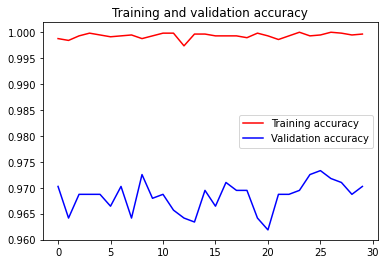

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history5.history['accuracy']
val_acc =history5.history['val_accuracy']
loss = history5.history['loss']
val_loss =history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

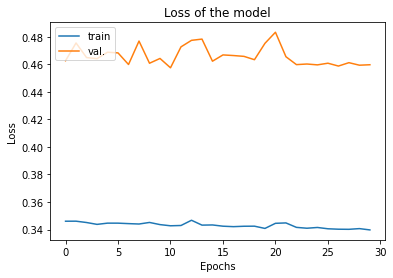

In [ ]:
# comparing training and testing loss 
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val.'],loc='upper left')
plt.show()

# **Data Visualization**

In [ ]:
index = ['glioma','meningioma','notumor','pituitary']
trained_classes=[]
for i in train_generator.classes:
  trained_classes.append(index[i])
print(trained_classes[:5])
test_classes=[]
for i in test_generator.classes:
  test_classes.append(index[i])
print(test_classes[:5])

['glioma', 'glioma', 'glioma', 'glioma', 'glioma']
['glioma', 'glioma', 'glioma', 'glioma', 'glioma']


## **Load the High Accuracy Model for Testing.**

In [ ]:
model.save('/content/drive/MyDrive/final model/97%model5.h5')

# **Model Evaluation**

In [11]:
model_nw=load_model('/content/drive/MyDrive/final model/97%model5.h5')

In [ ]:
score = model_nw.evaluate(test_data, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 7s 246ms/step - loss: 0.4597 - accuracy: 0.9703
Test loss: 0.4596872925758362
Test accuracy: 0.970251739025116


In [12]:
predictions=model_nw.predict(test_data)

In [13]:
classes=test_data.class_names

In [21]:
test_labels=test_label


predict_labels_Test
Numbre of glioma : 294
Numbre of meningioma : 305
Numbre of notumor : 409
Numbre of pituitary : 303

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       294
           1       0.94      0.94      0.94       305
           2       1.00      0.99      1.00       409
           3       0.99      0.98      0.99       303

   micro avg       0.97      0.97      0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311
 samples avg       0.97      0.97      0.97      1311



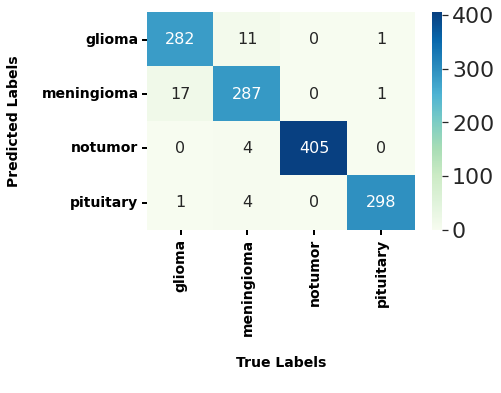

In [22]:
num_classes=4
predict_labels_Test = predictions
predict_labels=np.argmax(predict_labels_Test, axis=1)
# print(predict_labels)

predict_labels_TestV2_ctg = np_utils.to_categorical(predict_labels, num_classes)
labels_Test_ctg = np_utils.to_categorical(test_labels, num_classes)
predict_labels_Ar = np.asarray(predict_labels)
print("\npredict_labels_Test")
print(f'Numbre of {classes[0]} : {(predict_labels_Ar == 0).sum()}')
print(f'Numbre of {classes[1]} : {(predict_labels_Ar == 1).sum()}')
print(f'Numbre of {classes[2]} : {(predict_labels_Ar == 2).sum()}')
print(f'Numbre of {classes[3]} : {(predict_labels_Ar == 3).sum()}')

print("\n"+classification_report(predict_labels_TestV2_ctg, labels_Test_ctg))

cm = confusion_matrix(predict_labels, test_labels) 
#cm1=np.array([[126, 1, 3], [0,193,9],[0,7,190]])

plt.figure()
ax= plt.subplot()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(which='major', width=1.00)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', width=0.75)
ax.tick_params(which='minor', length=2.5)
ax.tick_params(direction='out', length=5, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)
sns.set(font_scale=2)
sns.heatmap(cm, annot= True, fmt='', cmap='GnBu', cbar=True, annot_kws={"size": 16})
labels=classes
plt.rcParams.update(andy_theme)
ax.set_xlabel("\nTrue Labels\n" ,fontweight="bold")
ax.set_ylabel("Predicted Labels\n" ,fontweight="bold")
#ax.set_title('Confusion Matrix of VGG 16 Model',fontweight="bold"); 
ax.xaxis.set_ticklabels(labels,fontweight="bold", rotation = 90,); 
ax.yaxis.set_ticklabels(labels,fontweight="bold", rotation = 0,);

plt.show()

In [23]:
Accuracy=accuracy_score(predict_labels, test_labels)
Accuracy

0.9702517162471396

# **ROC_AUC Curve**

In [25]:
test_classes=to_categorical(test_labels)

In [28]:
AUC=roc_auc_score(test_classes,predictions)
AUC  

0.9959487974246162

ROC AUC score: 0.9790126670809312


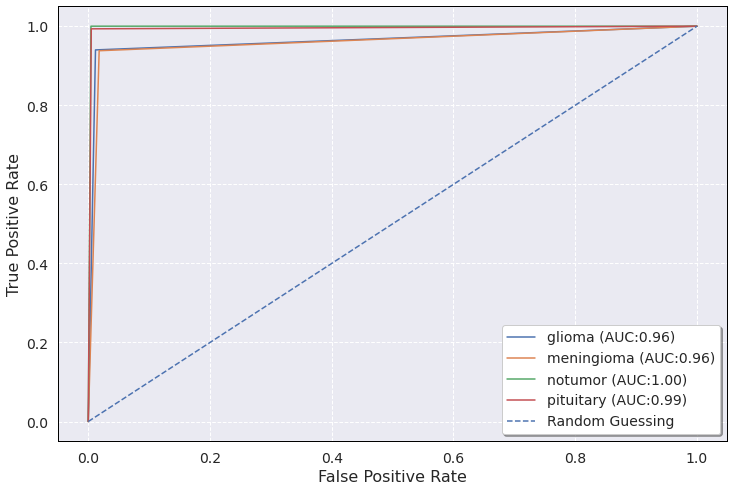

In [31]:
target= class_names

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', linestyle='--',label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_labels,predict_labels))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


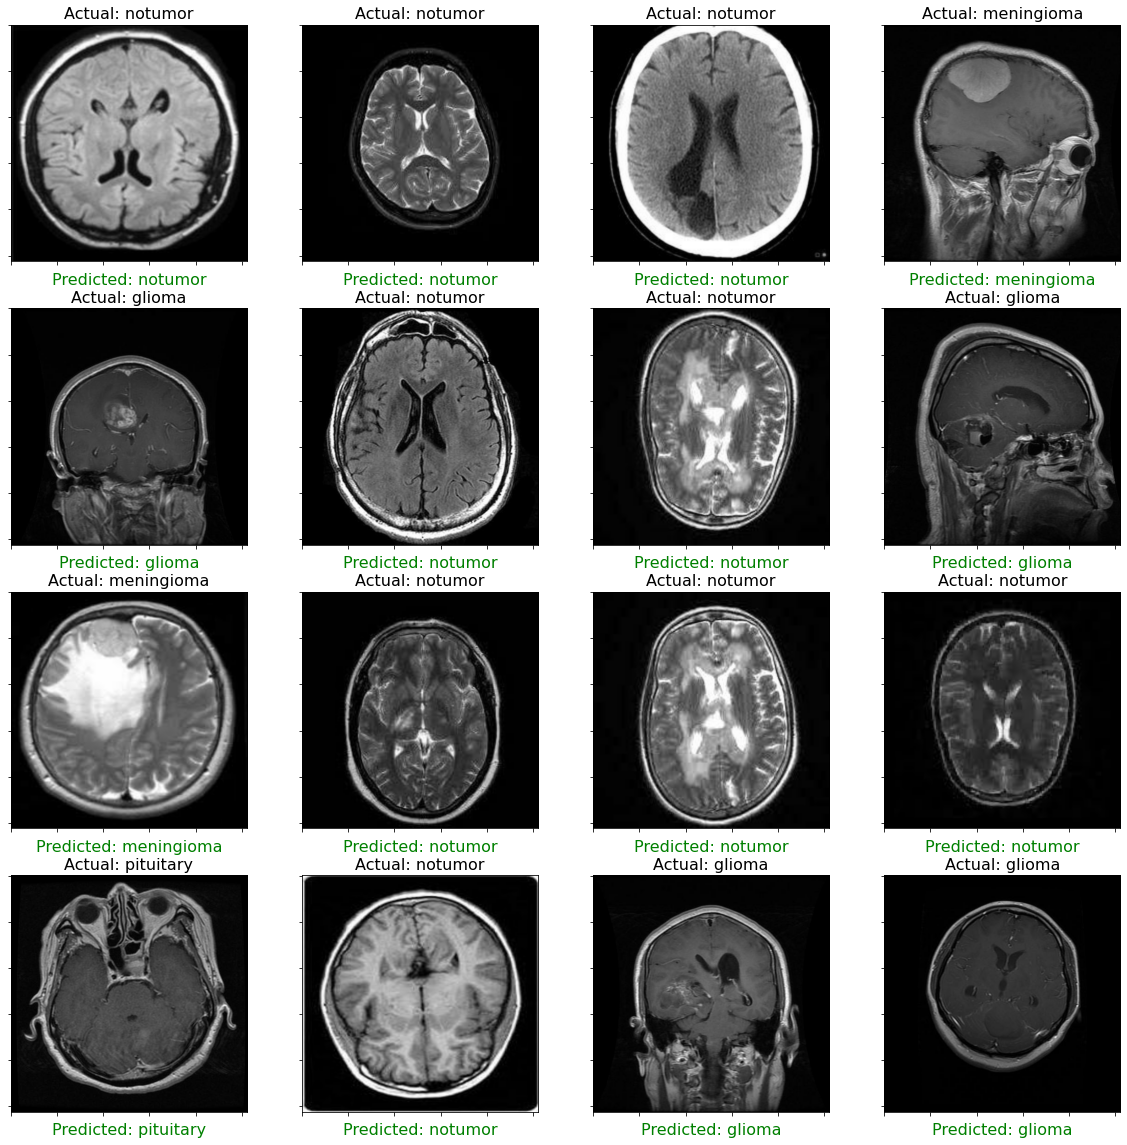

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model_nw.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+ class_names[labels[i]],fontsize=16)
            plt.xlabel("Predicted: "+ class_names[np.argmax(score)],fontsize=16,fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+ class_names[labels[i]],fontsize=16)
            plt.xlabel("Predicted: "+ class_names[np.argmax(score)],fontsize=16, fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])